# Employee Satisfaction
Project by Oki Samila Rici

# Use Case Summary
* Objective Statement: 
  
  * Get an insight about what is the effect of salary on the employee
  * Get an insight into which department has the lowest salary
  * Get an insight into what department most leave the company
  * Get an insight about how satisfaction employees who left the company

* Analytisc Technique:

  * Descriptive Analysis
  * Graph Analysis

* Expected Outcome:

  * Know what is the effect of salary on the employee
  * Know the name of a low-paying company department
  * Know what department most leave the company
  * Know how satisfaction employees who left the company 

# Business Understanding

* This dataset contains a company that records various employee parameters (example : salary, satisfaction level, etc).
* This case contains some business questions based on the data:

  * What is the effect of salary on the employee?
  * Which department has the lowest salary?
  * what department most leave the company?
  * How satisfaction employees who left the company?

# Data Understanding
* Source data by Kaggle
* Data Dictionary:

  *  statisfaction_level: satisfaction level at the job of an employee
  * last_evaluation: rating between 0 to 1 received by an employee at this last evaluation
  * number_project: number of projects an employee involved 
  * average_monthly_hours: average number of hours in a month, spent by an employee at the company
  * time_spend_company: number of years spent in the company
  * Work_accident : 0 = no accident during employee stay, 1 = accident during employee stay
  * left : 0 = indicates employee stay in the company, 1 = indicates employee left the company
  * promotion_last_5year: number of promotions in his stay
  * Department: department an employee belongs to
  * salary: salary in USD





# Data Preparation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv("sample_data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* All columns, except sales and salary columns are numeric.
* Work_accident, left, and promotion_last_5years are binary (0,1).
* The name of the sales column will be changed to Department.

In [3]:
# change the name of the sales variables to Departmen
df.rename(columns={'sales' : 'Department'}, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Cleansing

In [4]:
# general information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# checking missing values per column
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

The dataset has no missing values, and the data type names are all correct.

In [6]:
# duplicated data check
df.duplicated().sum()

3008

The dataset contains 3008 duplicated data points that must be removed.

In [7]:
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('average_montly_hours').head(8)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
13401,0.28,0.89,4,97,6,0,0,0,management,low
11190,0.28,0.89,4,97,6,0,0,0,management,low
10848,0.83,0.86,4,98,4,0,0,0,sales,low
10809,0.51,0.74,6,98,3,0,0,0,support,low
13020,0.51,0.74,6,98,3,0,0,0,support,low
13059,0.83,0.86,4,98,4,0,0,0,sales,low
11871,0.77,0.68,3,98,3,0,0,0,support,medium
14082,0.77,0.68,3,98,3,0,0,0,support,medium


In [8]:
# drop duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


# Exploratory Data Analysis

# Statistical Summary

In [10]:
# group column names based on type 
categoricals = ['Department','salary']
numericals = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']


In [11]:
# numerical statistical summary
df[numericals].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


*  All statistical summary values have appropriate values.
*  Mean < Median in satisfaction_level and number_project, indicating negatively skewed distribution.
*  Mean ~ Median in last_evaluation and average_monthly_hours, indicating somewhat a symmetrical distribution.
*  Mean > Median in time_spend_company, indicating positively skewed.
*  Work_accident, left, and pomotion_last_5years, are binary/boolean columns since the value is 0 or 1.

In [12]:
# describe methond on categorical data
df[categoricals].describe()

,Department,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


Department have 10 unique values and salary have 3 uique values






In [13]:
# showing the precise value counts
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Department column
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64 

Value counts of salary column
low       5740
medium    5261
high       990
Name: salary, dtype: int64 



* sales, technical, and support have the most employees in the department.
* low and medium salaries occupy the highest numbers


















# Univariate Analysis

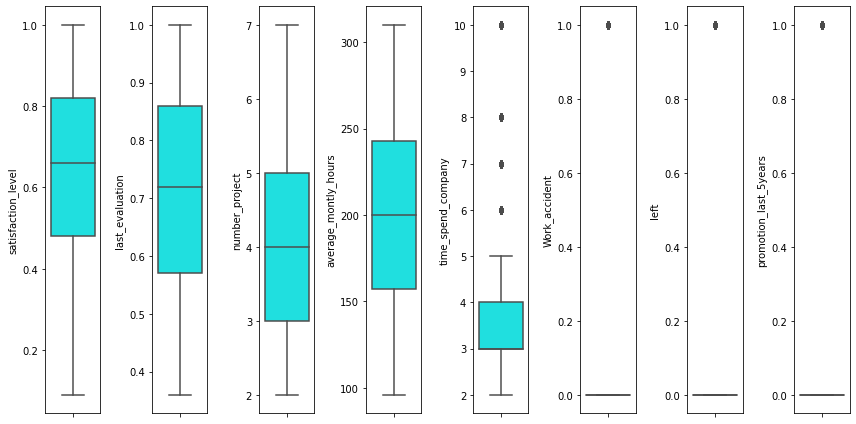

In [14]:
# boxpot to detect outliers
plt.figure(figsize=(12,6))
                  
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

In [15]:
df.time_spend_company.value_counts(normalize=False)

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

There are many outliers in time_spend_company, because the average employee worked at the company only 2 to 5 year

In [16]:
df.Work_accident.value_counts(normalize=False)

0    10141
1     1850
Name: Work_accident, dtype: int64

Work_accident have an outlier because more are not work accidents

In [17]:
df.left.value_counts(normalize=False)

0    10000
1     1991
Name: left, dtype: int64

left variable have an outlier because more employees who don't leave the company

In [18]:
df.promotion_last_5years.value_counts(normalize=False)

0    11788
1      203
Name: promotion_last_5years, dtype: int64

The outlier promotion_last_5year variable on number (1), because more employees who have not received a promotion in the last five years

# KDE Plot for Knowing Distribution Form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

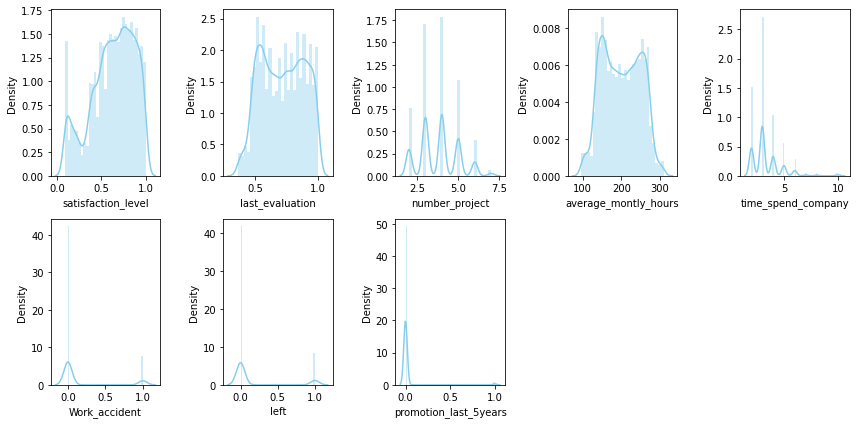

In [19]:
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

* statisfaction_level is slightly negative skewed.
* last_evaluation and average_monthly_hours the most symmetric distribution.
* number project and time_spend_company are slightly positively skewed
* Work_accident, left, and promotion_last_5years has boolean with value 0 and 1.

# Bivariat Analysis

In [20]:
# What is the effect of salary to the employee?
df_group = df.groupby(["salary"])["left"].count().reset_index()
df1 = df_group.sort_values(["left"],ascending=False)
df1.head()

,salary,left
1,low,5740
2,medium,5261
0,high,990


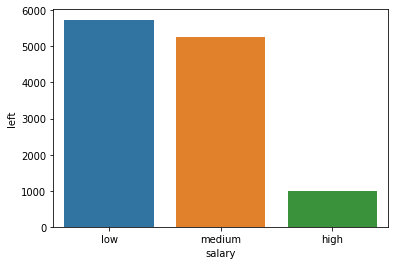

In [21]:
ax = sns.barplot(x="salary", y="left", data=df1)

Many employees leave the company because their salary is low and medium

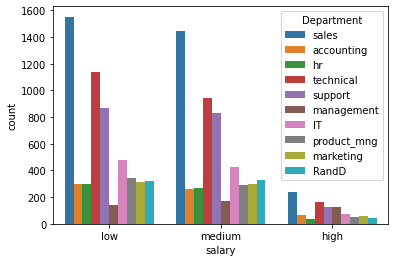

In [22]:
# Which department has the lowest salary?
sns.countplot(data=df,
            x='salary',
            hue='Department')

sales, technical and support departments have low and medium salary

In [23]:
# what department most leave the company?
df_group = df.groupby(["Department"])["left"].count().reset_index()
df2 = df_group.sort_values(["left"],ascending=False)
df2

,Department,left
7,sales,3239
9,technical,2244
8,support,1821
0,IT,976
1,RandD,694
6,product_mng,686
5,marketing,673
2,accounting,621
3,hr,601
4,management,436


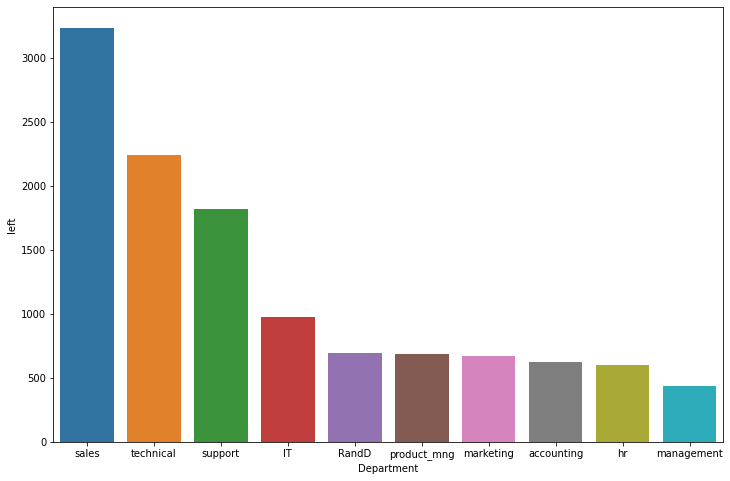

In [24]:
fig = plt.figure(figsize =(12, 8))
sns.barplot(x = "Department",
            y = "left",
            data = df2)
plt.show()

The sales department has the most employees who leave the company, followed by the technical and support departments.

In [25]:
# How satisfaction employees who left the company?
## Aggregating satisfaction level with left
df_agg= df.groupby("satisfaction_level").left.sum()
df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,satisfaction_level,left
0,0.09,110
1,0.10,203
2,0.11,188
3,0.12,2
4,0.13,1


In [26]:
def plot_df(df, x, y, title="Satisfaction of Employee", xlabel='satisfaction_level', ylabel='left', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

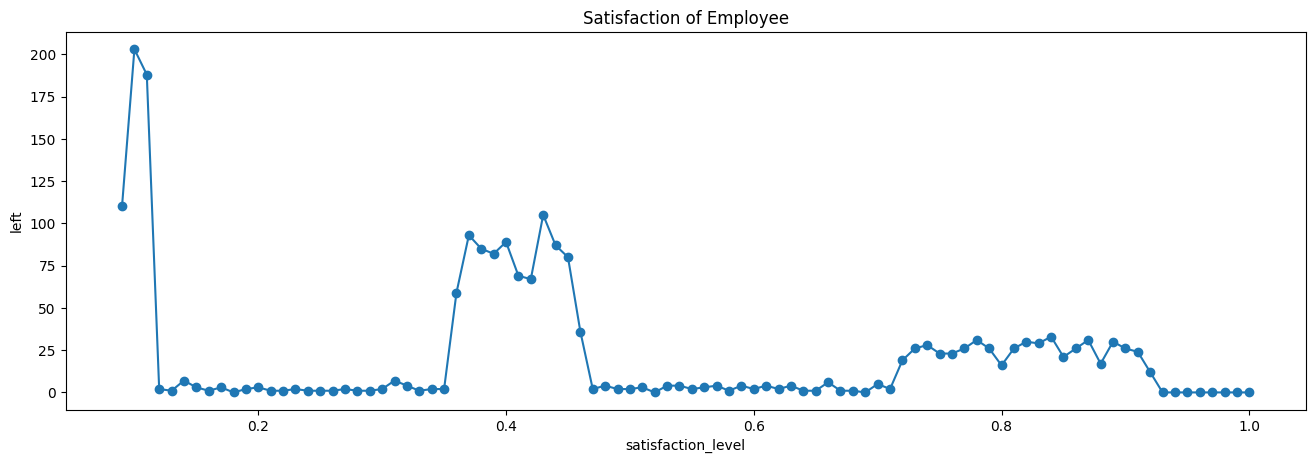

In [27]:
plot_df(df_agg, x=df_agg.satisfaction_level, y=df_agg.left,title='Satisfaction of Employee')

The highest number of employees leaving a company with a low satisfaction rate is below 20%

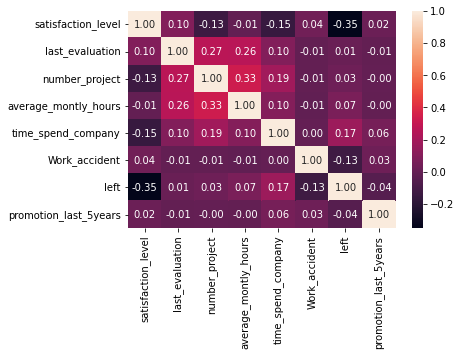

In [28]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

* The correlation between an average_monthly_hour and number_project is 33%, indicating that the employee's length of time in the company (a matter of months) has a significant impact on the number of projects completed by the employee.
* The correlation between number_project and last_evaluation by 27%, meaning  that the number of projects has a high effect on employee evaluation.
* The correlation between average_monthly_hour and last_evaluation is 26%, indicating that the employee's length of time in the company (month) has a high effect on employee evaluation.
* According to this correlation matrix, the higher someone's job satisfaction, the less likely they are to leave.
 


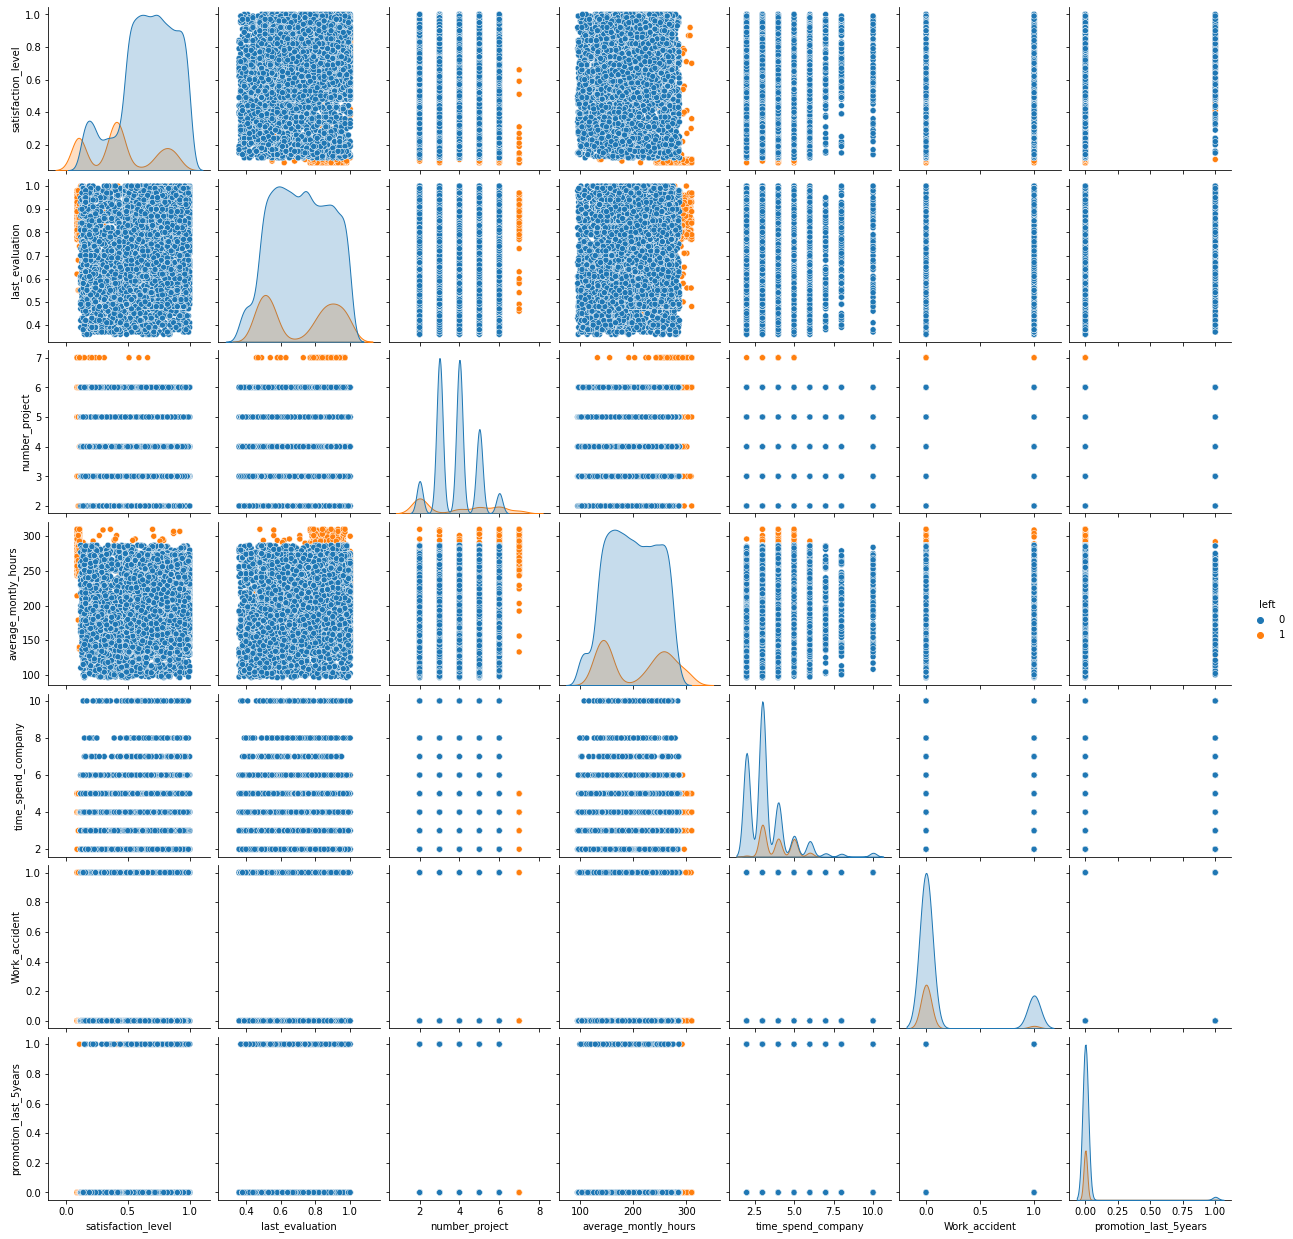

In [29]:
# pairplot of the data
sns.pairplot(df, hue='left')

The blue color represents employees who don't leave the company, while the orange color represents employees who do leave the company.  fewer employees leave the company. Correlations between variables that do not have positive or negative correlations accumulate in the middle.

# Conclusion
* In the dataset, fewer employees are leaving the company, which is 1991 employees and 10000 employees remain in the company. 
* The analysis focuses on employees leaving the company, with salaries having a significant impact on the number of employees leaving the company. Employees who are paid more in the low and medium ranges are more likely to leave the company.
* The lowest and medium salaries were found in the sales, technical, and support departments.
* The highest number of employees who left the company came from sales departments of 3239 employees, technical departments of 2244 employees, and support departments of 1821 employees. 
* Employees who leave the company have an average satisfaction rate of less than 50% and the highest number with the lowest satisfaction level is less than 20%.
